In [3]:
import matplotlib.pyplot as plt
import numpy as np
from pylab import *
from matplotlib import pyplot
import torch
import pandas as pd
import pickle
from os import listdir

In [2]:
w1 = np.load('w1_hebb.npy')
w2 = np.load('w2_hebb.npy')
w3 = np.load('w3_hebb.npy')
param = np.load('param_hebb.npy')
action = np.load('actions_hebb.npy')
arch = [27, 64, 32, 18]


In [3]:
w_num = 4352
A = param[0:w_num]
B = param[w_num:2*w_num]
C = param[2*w_num:3*w_num]
D = param[3*w_num:4*w_num]
lr = param[4*w_num:5*w_num]


### Analyse Param 

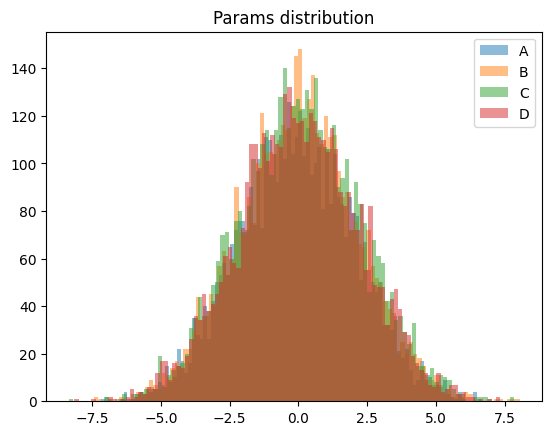

In [4]:
# ABCD
plt.title('Params distribution')
plt.hist(A, bins=100, label='A', alpha=.5)
plt.hist(B, bins=100, label='B', alpha=.5)
plt.hist(C, bins=100, label='C', alpha=.5)
plt.hist(D, bins=100, label='D', alpha=.5)
plt.legend()
plt.show()

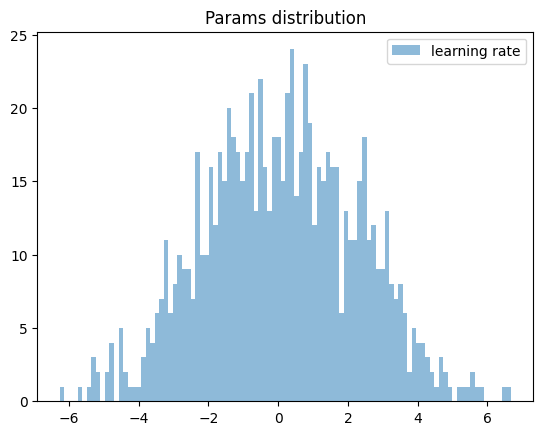

In [5]:
# lr
plt.title('Params distribution')
plt.hist(lr, bins=100, label='learning rate', alpha=.5)
plt.legend()
plt.show()

In [6]:
lr

array([ 3.48235970e+00, -4.92710790e+00, -8.23541065e-01, -9.31529985e-01,
        1.14020052e+00, -1.57011029e+00, -1.30486502e+00, -1.83182151e+00,
       -1.46206983e+00,  2.30083083e+00,  3.73719444e+00, -1.24740830e+00,
        9.43613518e-01,  2.50616858e+00, -7.55256204e-01,  1.49425128e+00,
        2.78947356e-01,  1.85575847e+00, -3.71818578e+00,  5.19586694e-01,
       -1.11553643e+00, -1.69768618e+00,  3.30668685e+00, -2.52273452e+00,
       -1.18648468e+00, -3.85574538e+00,  2.06247106e-01, -2.05001075e+00,
       -3.05368913e+00, -1.37660846e-01,  1.26380950e+00,  1.16370151e+00,
       -1.46809306e+00, -3.24204888e+00,  2.74113825e+00, -6.51293293e-03,
        7.54525300e-02,  2.43157188e+00, -4.55037133e+00, -3.20283830e+00,
       -3.59092900e+00, -8.01339666e-01, -1.48828181e-01,  1.53714626e+00,
       -3.33584619e+00, -3.29234216e+00, -2.41750417e+00, -1.44068792e+00,
       -1.01637610e+00, -7.44865779e-01, -3.62535107e+00, -9.72703525e-01,
       -1.40742852e-01, -

In [7]:
np.diff(w1[:, 0, :], axis=0).shape

(299, 19, 64)

#### weight value

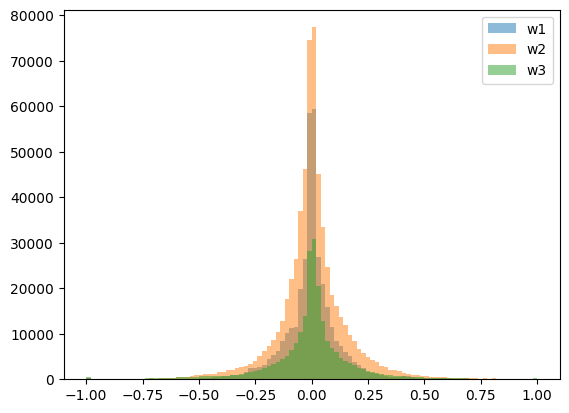

In [8]:
plt.hist(w1[:, 0, :].flatten(), bins=100, alpha=.5, label='w1')
plt.hist(w2[:, 0, :].flatten(), bins=100, alpha=.5, label='w2')
plt.hist(w3[:, 0, :].flatten(), bins=100, alpha=.5, label='w3')
plt.legend()
plt.show()

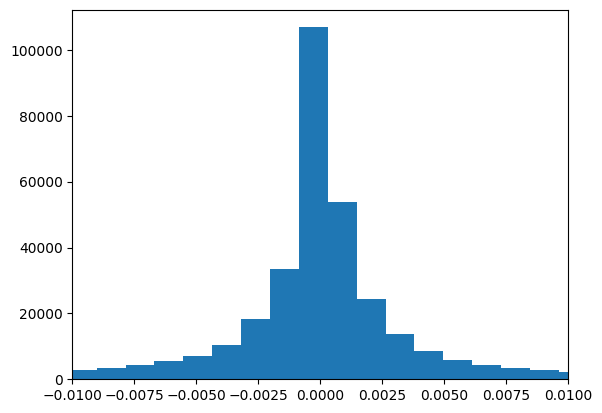

In [9]:
# w1
plt.hist(np.diff(w1[:, 0, :], axis=0).flatten(), bins=1000)
plt.xlim([-.01, .01])
plt.show()

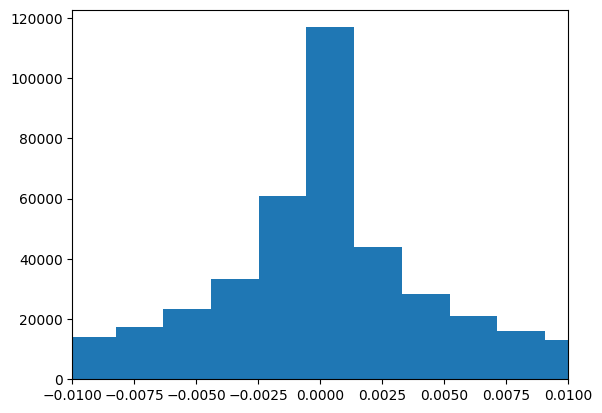

In [10]:
# w2
plt.hist(np.diff(w2[:, 0, :], axis=0).flatten(), bins=1000)
plt.xlim([-.01, .01])
plt.show()

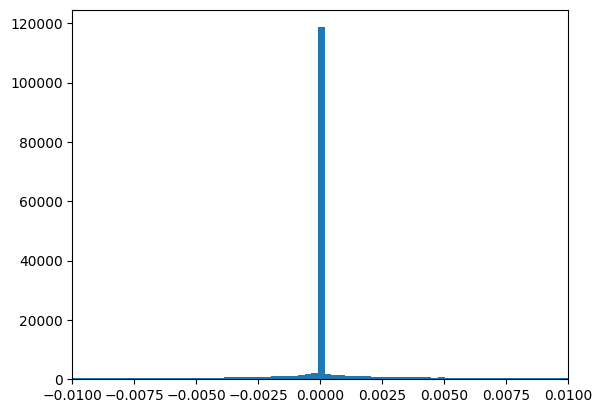

In [11]:
# w3
plt.hist(np.diff(w3[:, 0, :], axis=0).flatten(), bins=10000)
plt.xlim([-.01, .01])
plt.show()

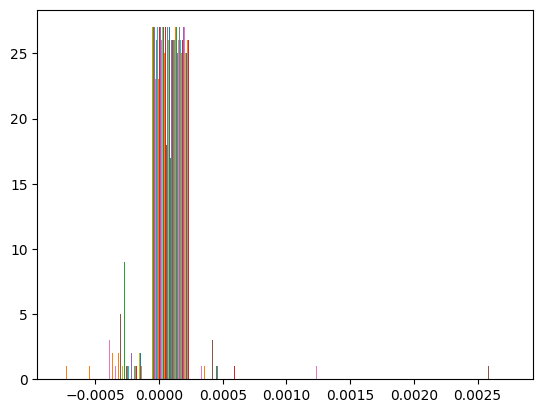

In [31]:
plt.hist(np.mean(np.diff(w1[:, 1, :], axis=0), axis=0))
plt.show()

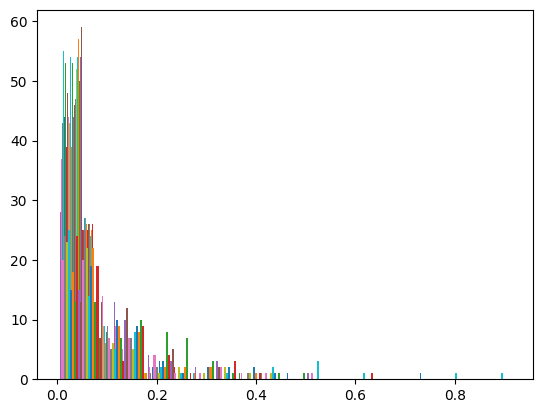

In [19]:
# w1
plt.hist(np.mean(np.diff(w1[:, 0, :], axis=0), axis=0))
plt.show()
# w2
plt.hist(np.mean(np.diff(w2[:, 0, :], axis=0), axis=0))
plt.show()
# w3
plt.hist(np.mean(np.diff(w3[:, 0, :], axis=0), axis=0))
plt.show()

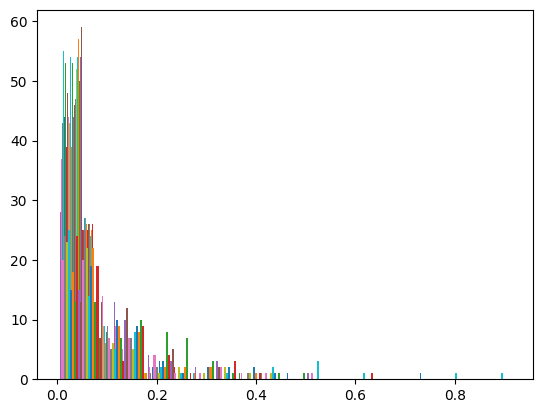

In [20]:
# w1
plt.hist(np.max(np.diff(w1[:, 0, :], axis=0), axis=0))
# plt.show()
# w2
plt.hist(np.max(np.diff(w2[:, 0, :], axis=0), axis=0))
# plt.show()
# w3
plt.hist(np.max(np.diff(w3[:, 0, :], axis=0), axis=0))
plt.show()

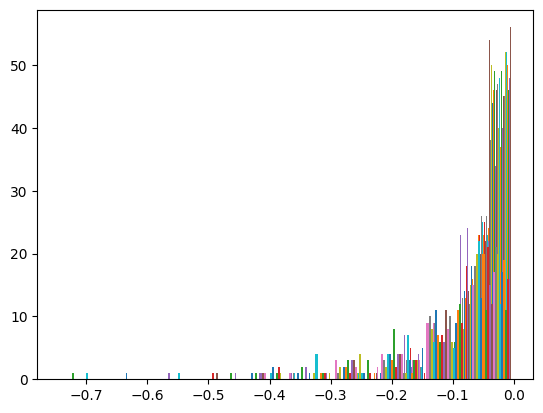

In [23]:
# w1
plt.hist(np.min(np.diff(w1[:, 0, :], axis=0), axis=0))
# plt.show()
# w2
plt.hist(np.min(np.diff(w2[:, 0, :], axis=0), axis=0))
# plt.show()
# w3
plt.hist(np.min(np.diff(w3[:, 0, :], axis=0), axis=0))
plt.show()

### Convert pickle to weight array for real robot

In [33]:
model = 'FF'
dir_path = '../data/dbAlpha/model/rd/'+model+'/'
file_name = 'Feedforward_dbAlpha_6legs_walk_vxuy_d_4352499_249.73641967773438.pickle'
trained_data = pickle.load(open(dir_path+file_name, 'rb'))
open_es_data = trained_data[0]
init_params = open_es_data.best_param() # best_mu   


ModuleNotFoundError: No module named 'omniisaacgymenvs'

In [8]:
file_name = 'Feedforward_box_trans_tiltL_Best_weight.npy'
data = np.load(file_name)
data


array([ 0.01116791, -1.56322764, -4.01109146, ..., -2.34874455,
        0.70149657,  1.12638691])

In [9]:
# 4 legs FF shape 3648
# 6 legs FF shape 4352
data.shape 


(4352,)

## Oscillatory weight pattern Analysis

### Feedforward model

In [3]:
w1 = np.load('./behavior/rd/walk/ff/vxuy/w1_Feedforward_249.npy')
w2 = np.load('./behavior/rd/walk/ff/vxuy/w2_Feedforward_249.npy')
w3 = np.load('./behavior/rd/walk/ff/vxuy/w3_Feedforward_249.npy')
action = np.load('./behavior/rd/walk/ff/vxuy/actions_Feedforward_249.npy')
input = np.load('./behavior/rd/walk/ff/vxuy/input_Feedforward_249.npy')
arch = [27, 64, 32, 18]

In [14]:
n1_w1 = w1[:, 0, :]
n1_w2 = w2[:, 0, :]
n1_w3 = w3[:, 0, :]
n1_action = action[:, 0, :]

In [13]:
w1.shape, w2.shape, w3.shape

((300, 2, 27, 64), (300, 2, 64, 32), (300, 2, 32, 18))

In [6]:
n1 = action[:, 0, :]

In [7]:
n1.shape

(300, 18)

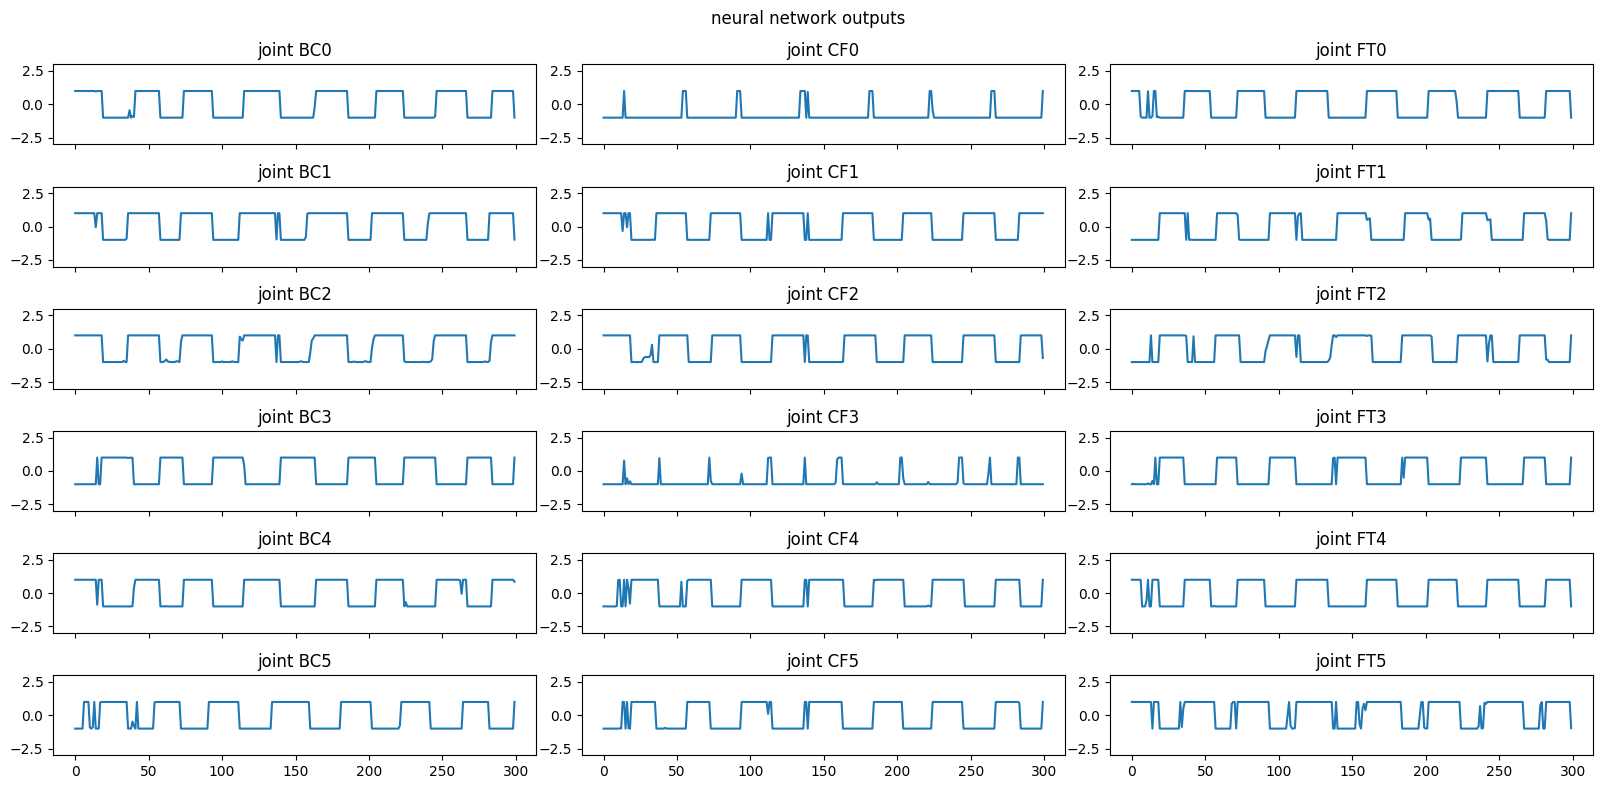

In [11]:
n1_action = action[:, 0, :]
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('neural network outputs')
output_list = ['BC1', 'BC2', 'BC4', 'BC5', 'BC0', 'BC3', 
               'CF1', 'CF2', 'CF4', 'CF5', 'CF0', 'CF3', 
               'FT1', 'FT2', 'FT4', 'FT5', 'FT0', 'FT3']
index = [4, 10, 16, 0, 6, 12,
         1, 7, 13, 5, 11, 17,
         2, 8, 14, 3, 9, 15]
output_list = np.take(output_list, index)
for i in range(6):
    for j in range(3):
        axes[i, j].plot(n1_action[:, index[(i*3)+j]])
        axes[i, j].set_title('joint '+output_list[(i*3)+j])
        axes[i, j].set_ylim([-3, 3]) # rad
fig.tight_layout()
# plt.savefig('ff_output.jpg', bbox_inches='tight')

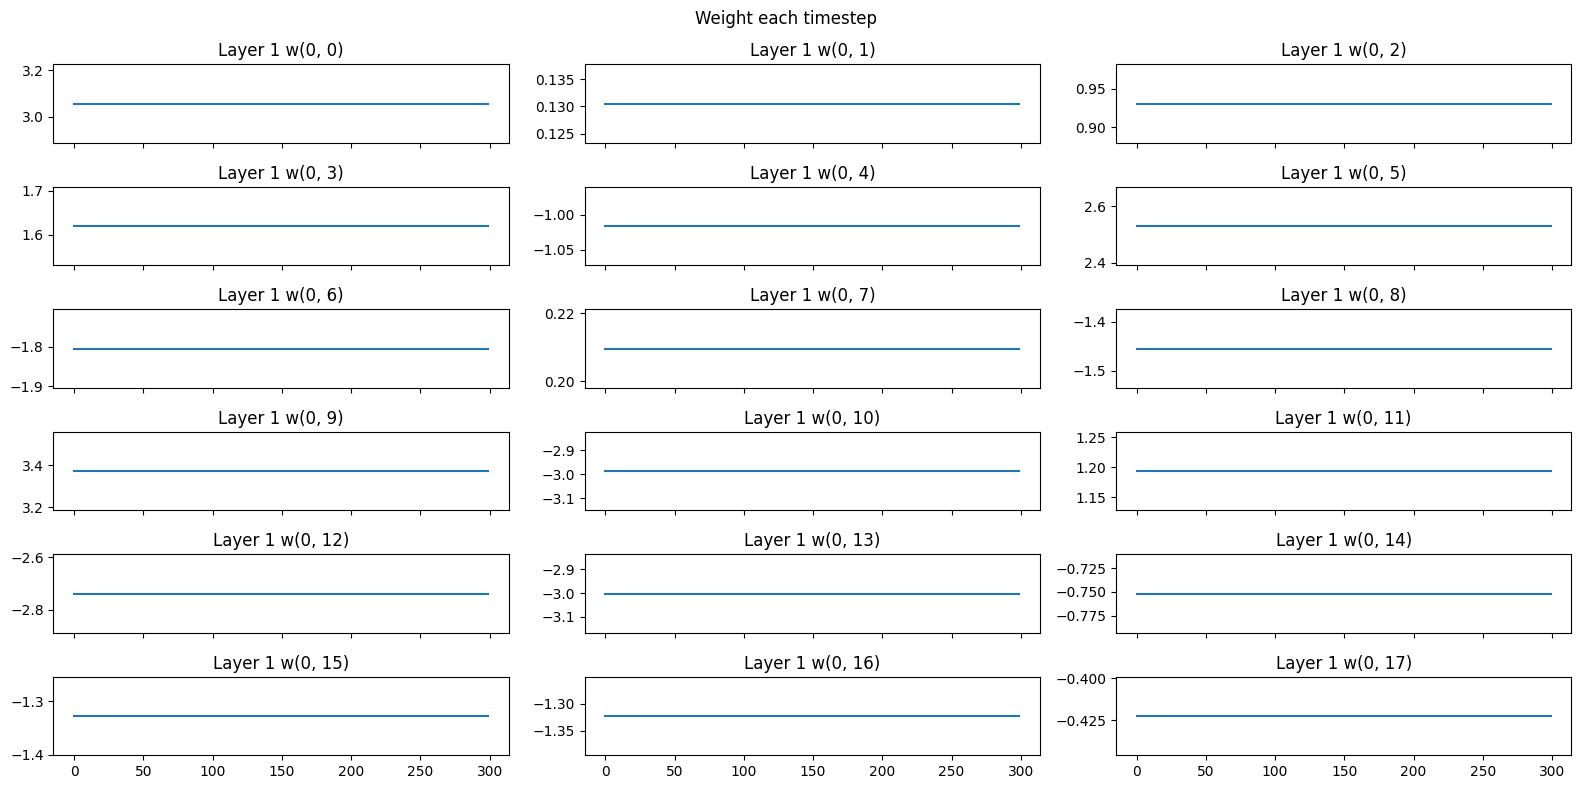

In [17]:
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('Weight each timestep')
for i in range(6,):
    for j in range(3):
        axes[i, j].plot(n1_w1[:, 16, (i*3)+j])
        axes[i, j].set_title('Layer 1 w(0, '+str((i*3)+j)+')')
        # axes[i, j].set_ylim([-0.2, 0.2]) # rad
fig.tight_layout()
# plt.savefig('hebb_w1.jpg', bbox_inches='tight')

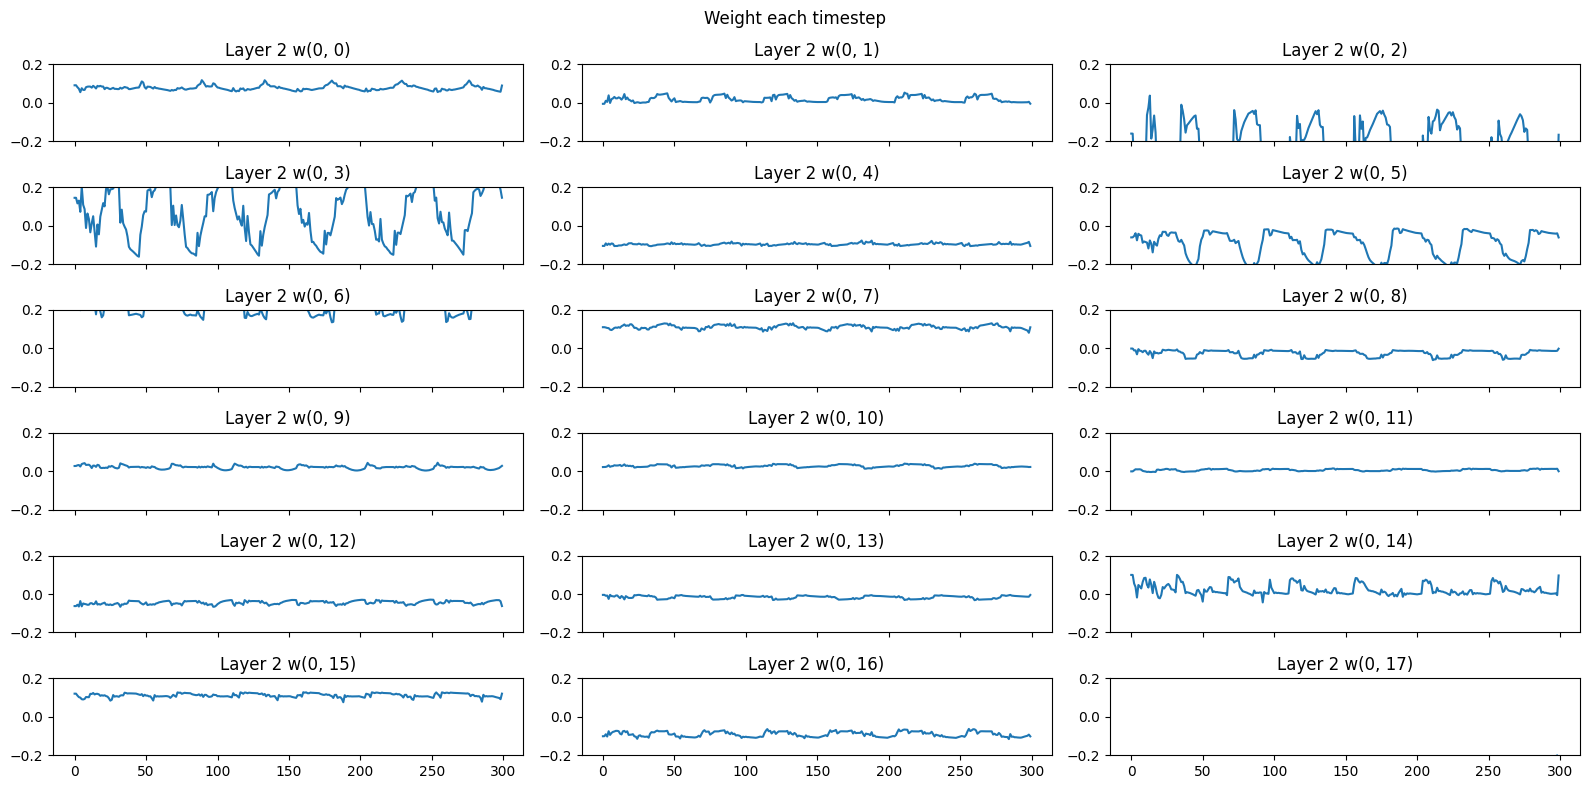

In [ ]:
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('Weight each timestep')
for i in range(6):
    for j in range(3):
        axes[i, j].plot(n1_w2[:, 0, (i*3)+j])
        axes[i, j].set_title('Layer 2 w(0, '+str((i*3)+j)+')')
        axes[i, j].set_ylim([-0.2, 0.2]) # rad
fig.tight_layout()
# plt.savefig('hebb_w2.jpg', bbox_inches='tight')

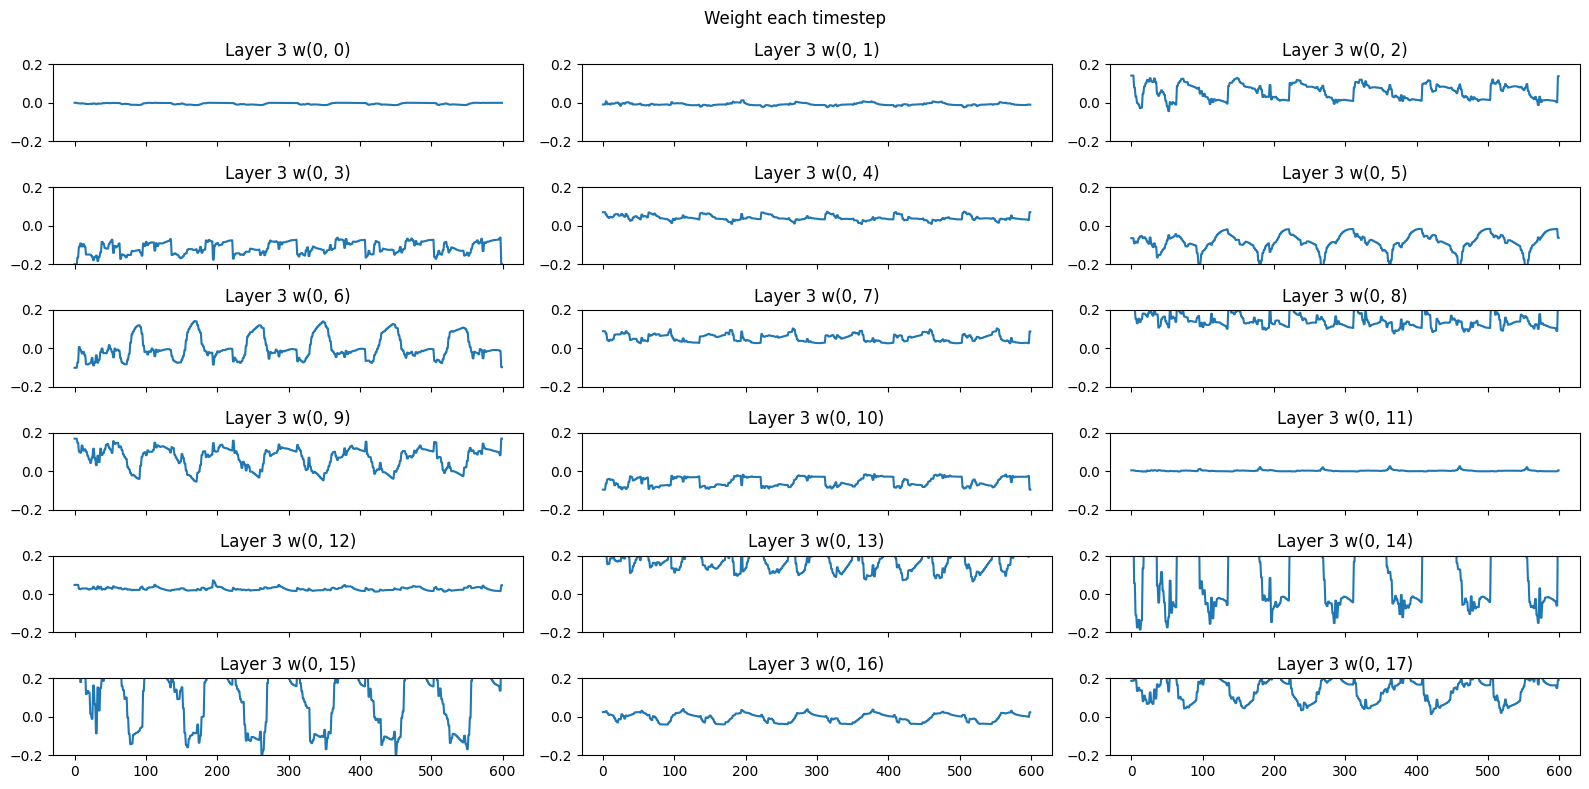

In [ ]:
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('Weight each timestep')
for i in range(6):
    for j in range(3):
        axes[i, j].plot(n1_w3[:, 0, (i*3)+j])
        axes[i, j].set_title('Layer 3 w(0, '+str((i*3)+j)+')')
        axes[i, j].set_ylim([-0.2, 0.2]) # rad
fig.tight_layout()
# plt.savefig('hebb_w3.jpg', bbox_inches='tight')

### Hebbian network

In [19]:
w1 = np.load('./walk_hebb/w1_hebb.npy')
w2 = np.load('./walk_hebb/w2_hebb.npy')
w3 = np.load('./walk_hebb/w3_hebb.npy')
action = np.load('./walk_hebb/actions_hebb.npy')
param = np.load('./walk_hebb/param_hebb.npy')
arch = [27, 64, 32, 18]

In [20]:
n1_w1 = w1[:, 0, :]
n1_w2 = w2[:, 0, :]
n1_w3 = w3[:, 0, :]
n1_action = action[:, 0, :]

In [21]:
print('numbe of weight: ', param.shape[0]//5)

numbe of weight:  4352


In [22]:
w_num = 4352
A = param[0:w_num]
B = param[w_num:2*w_num]
C = param[2*w_num:3*w_num]
D = param[3*w_num:4*w_num]
lr = param[4*w_num:5*w_num]

In [23]:
output_list = ['BC1', 'BC2', 'BC4', 'BC5', 'BC0', 'BC3', 
               'CF1', 'CF2', 'CF4', 'CF5', 'CF0', 'CF3', 
               'FT1', 'FT2', 'FT4', 'FT5', 'FT0', 'FT3']
# index = [3, 6, 12, 15, 4, 7,
#          13, 16, 0, 9, 5, 8,
#          14, 17, 1, 10, 2, 11]
# motorspace --> joint standard space
index = [4, 0, 1, 5, 2, 3, 
         10, 6, 7, 11, 8, 9, 
         16, 12, 13, 17, 14, 15]

In [24]:
np.take(output_list, index)

array(['BC0', 'BC1', 'BC2', 'BC3', 'BC4', 'BC5', 'CF0', 'CF1', 'CF2',
       'CF3', 'CF4', 'CF5', 'FT0', 'FT1', 'FT2', 'FT3', 'FT4', 'FT5'],
      dtype='<U3')

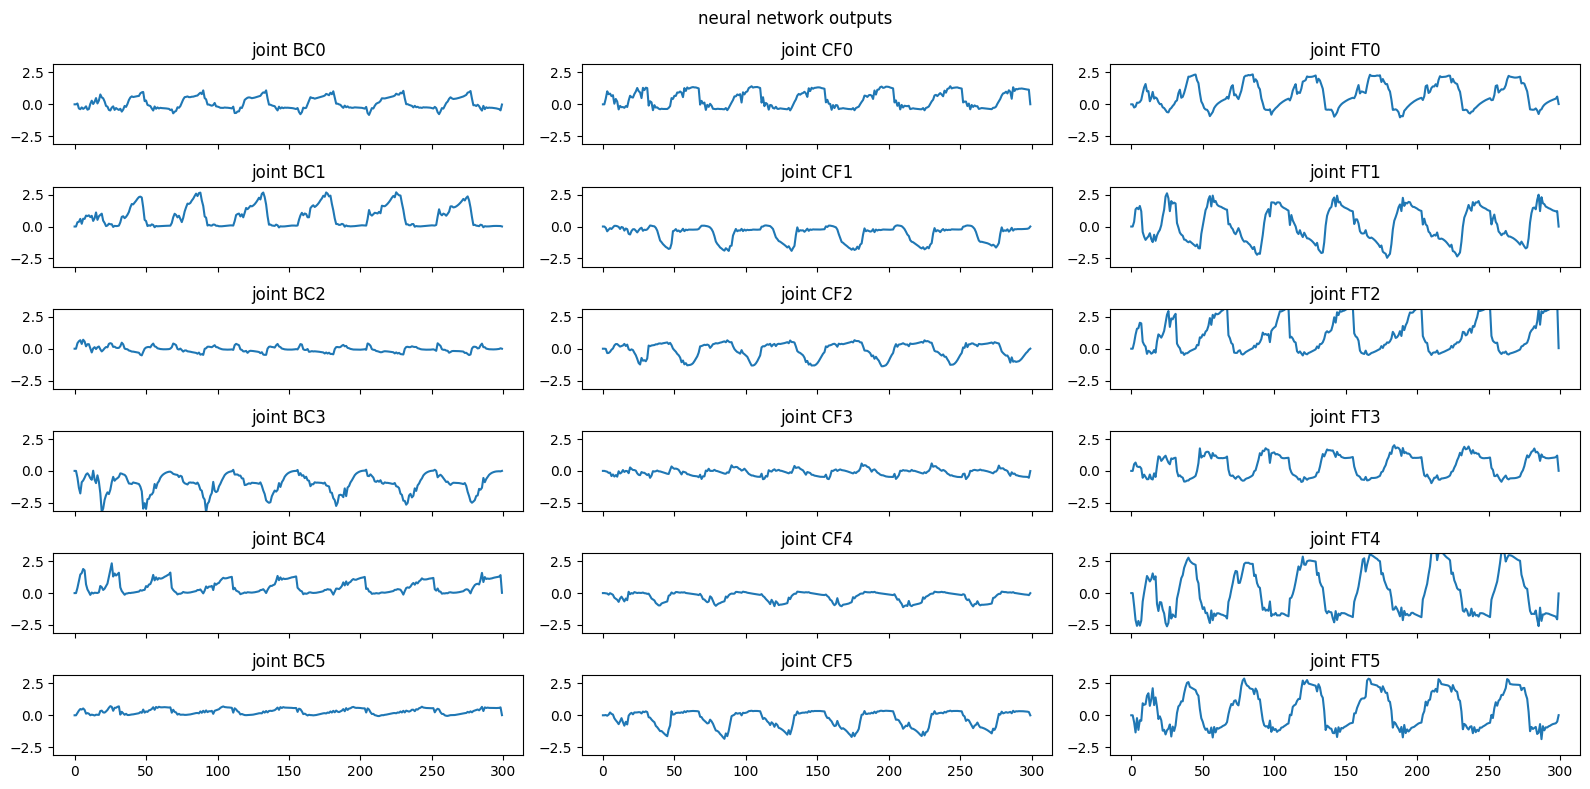

In [25]:
n1_action = action[:, 0, :]
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('neural network outputs')
output_list = ['BC1', 'BC2', 'BC4', 'BC5', 'BC0', 'BC3', 
               'CF1', 'CF2', 'CF4', 'CF5', 'CF0', 'CF3', 
               'FT1', 'FT2', 'FT4', 'FT5', 'FT0', 'FT3']
index = [4, 10, 16, 0, 6, 12,
         1, 7, 13, 5, 11, 17,
         2, 8, 14, 3, 9, 15]
output_list = np.take(output_list, index)
for i in range(6):
    for j in range(3):
        axes[i, j].plot(n1_action[:, index[(i*3)+j]])
        axes[i, j].set_title('joint '+output_list[(i*3)+j])
        axes[i, j].set_ylim([-3.14, 3.14]) # rad
fig.tight_layout()
# plt.savefig('hebb_output.jpg', bbox_inches='tight')

In [20]:
n1_w1[:, 0, 0].shape

(300,)

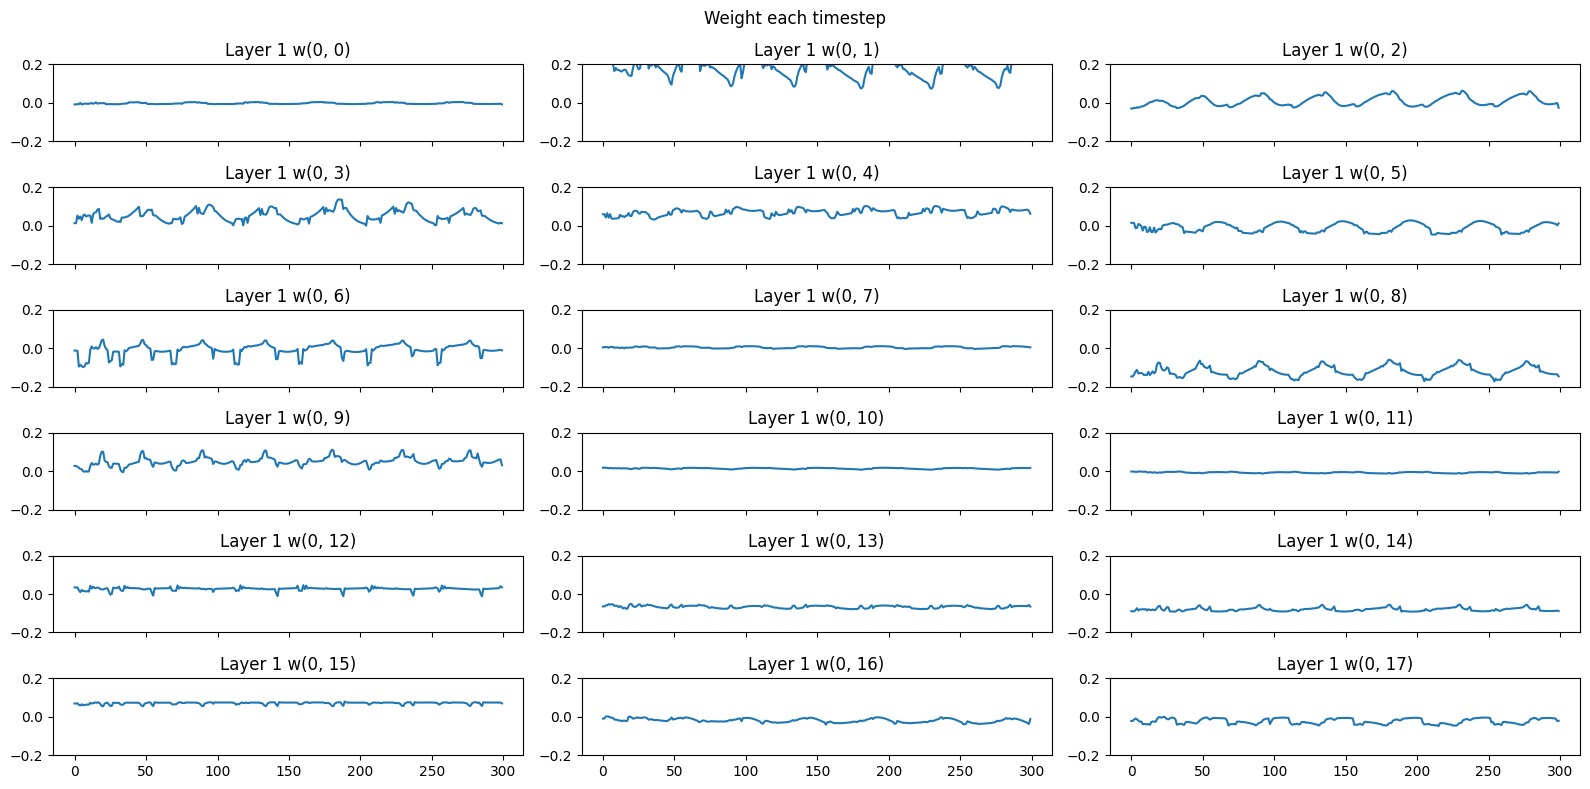

In [31]:
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('Weight each timestep')
for i in range(6,):
    for j in range(3):
        axes[i, j].plot(n1_w1[:, 16, (i*3)+j])
        axes[i, j].set_title('Layer 1 w(0, '+str((i*3)+j)+')')
        axes[i, j].set_ylim([-0.2, 0.2]) # rad
fig.tight_layout()
# plt.savefig('hebb_w1.jpg', bbox_inches='tight')

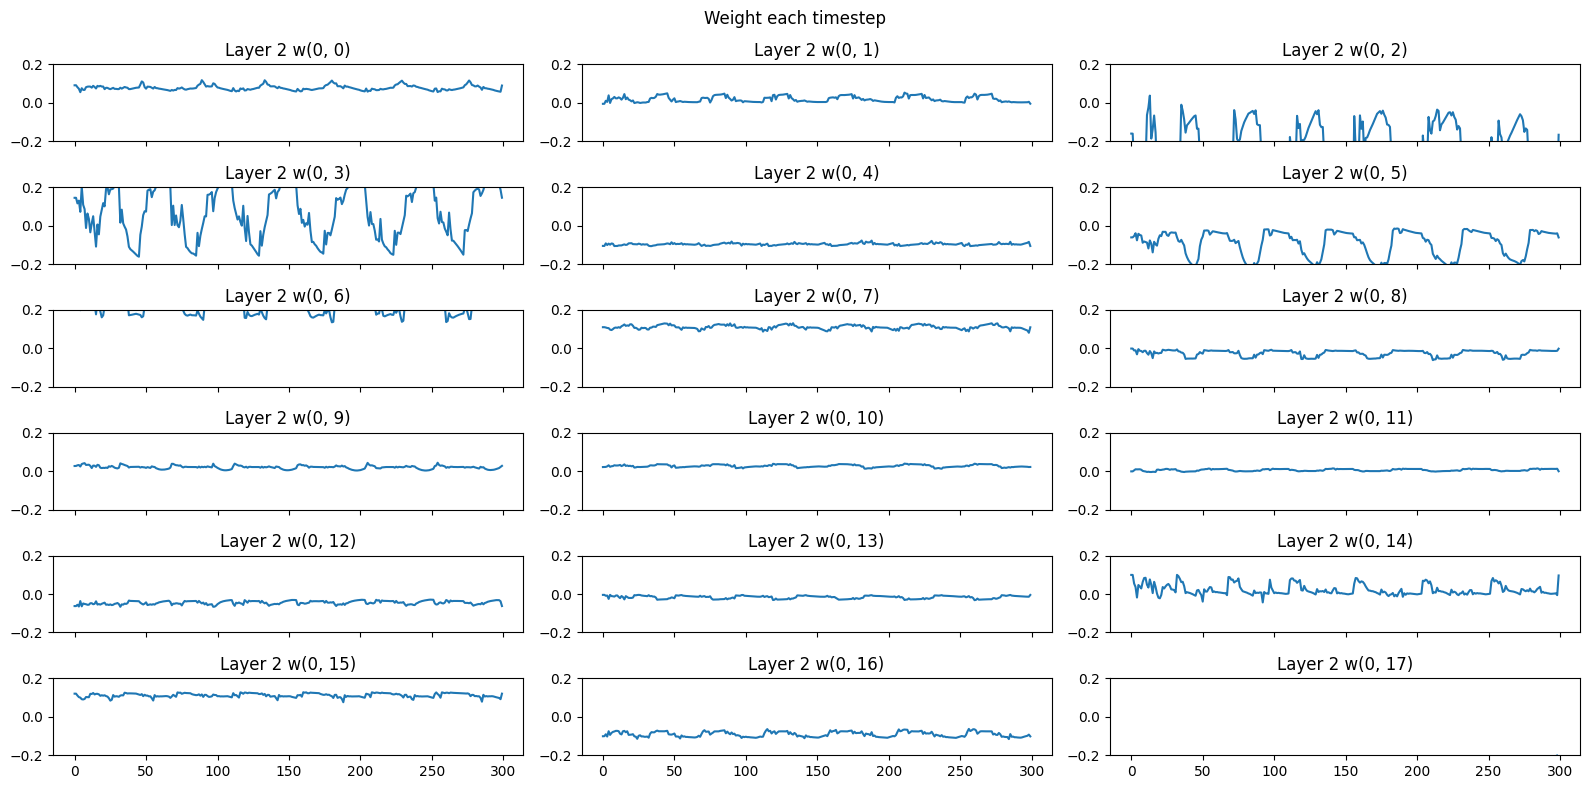

In [22]:
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('Weight each timestep')
for i in range(6):
    for j in range(3):
        axes[i, j].plot(n1_w2[:, 0, (i*3)+j])
        axes[i, j].set_title('Layer 2 w(0, '+str((i*3)+j)+')')
        axes[i, j].set_ylim([-0.2, 0.2]) # rad
fig.tight_layout()
# plt.savefig('hebb_w2.jpg', bbox_inches='tight')

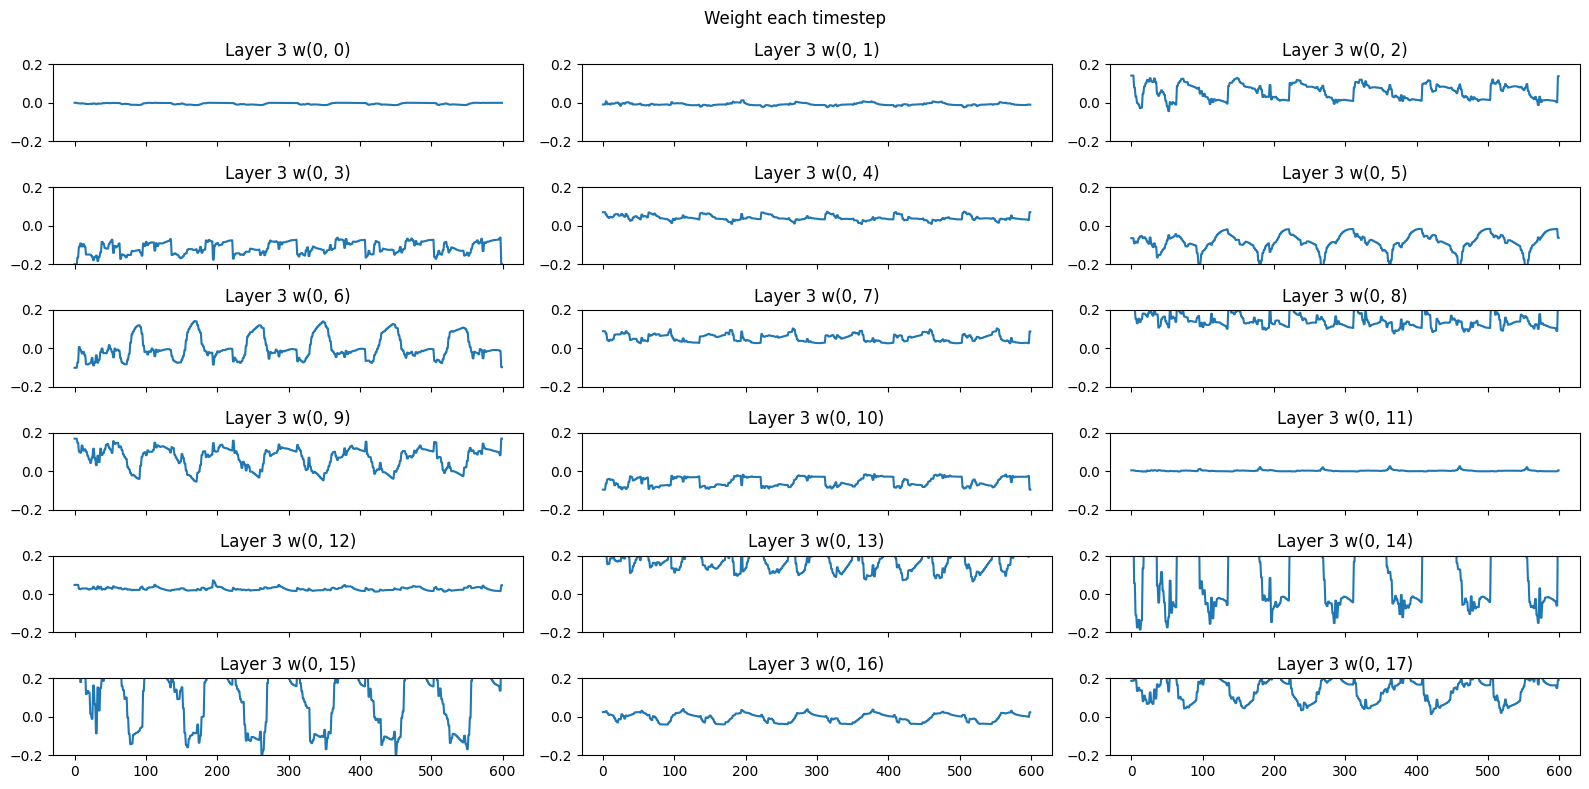

In [23]:
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('Weight each timestep')
for i in range(6):
    for j in range(3):
        axes[i, j].plot(n1_w3[:, 0, (i*3)+j])
        axes[i, j].set_title('Layer 3 w(0, '+str((i*3)+j)+')')
        axes[i, j].set_ylim([-0.2, 0.2]) # rad
fig.tight_layout()
# plt.savefig('hebb_w3.jpg', bbox_inches='tight')

## PCA Analysis

#### Example

In [33]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d


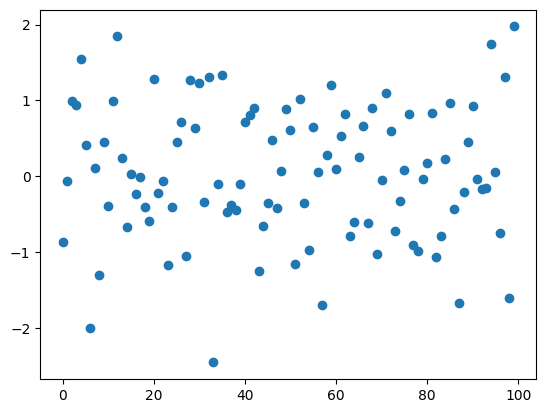

In [34]:
x = np.arange(100)
y = np.random.randn(100,)
z = np.random.rand(100,)
plt.scatter(x, y)

In [35]:
len(x)

100

In [36]:
time= np.arange(0, 10, 0.1)
x   = np.sin(time)
y   = np.cos(time)
z   = np.random.randn(len(time),)
data = np.array([x,y,z])
data.T.shape

(100, 3)

In [37]:
# df = pd.DataFrame({'x': x, 'y': y, 'z': z, 'w': z+1 })
df = pd.DataFrame(data=data.T)
df

,0,1,2
0,0.000000,1.000000,0.217875
1,0.099833,0.995004,-0.284957
2,0.198669,0.980067,0.352088
3,0.295520,0.955336,-0.494147
4,0.389418,0.921061,0.836395
...,...,...,...
95,-0.075151,-0.997172,-0.154495
96,-0.174327,-0.984688,1.760989
97,-0.271761,-0.962365,-1.643552
98,-0.366479,-0.930426,-0.441943


In [38]:
std_scaler = StandardScaler()
scaled_df = std_scaler.fit_transform(df)

pca = PCA(n_components=3)
data_reduced = pca.fit_transform(scaled_df)

In [39]:
print(pca.components_)

[[-0.72549336 -0.18003188 -0.66426494]
 [-0.13842525 -0.90728463  0.39708066]
 [ 0.67416455 -0.38003042 -0.63330802]]


In [40]:
data_reduced.shape

(100, 3)

Text(0.5, 0.92, 'simple 3D scatter plot')

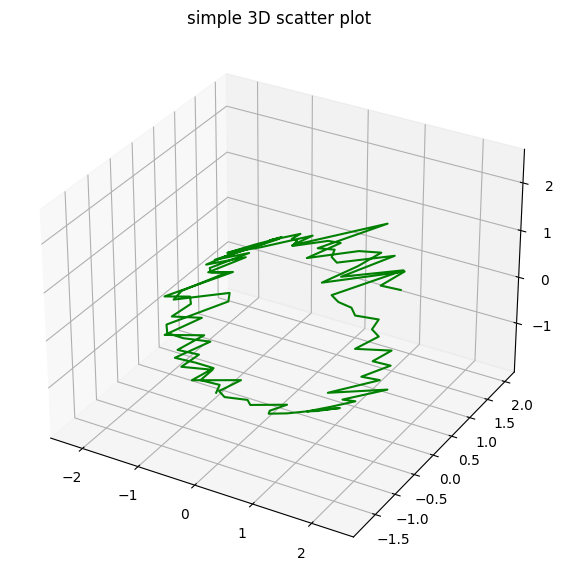

In [41]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
x = data_reduced[:100, 0]
y = data_reduced[:100, 1]
z = data_reduced[:100, 2]
ax.plot3D(x, y, z, color = "green")
plt.title("simple 3D scatter plot")

#### Real data

In [42]:
w1 = np.load('./walk_hebb/w1_hebb.npy')
w2 = np.load('./walk_hebb/w2_hebb.npy')
w3 = np.load('./walk_hebb/w3_hebb.npy')
action = np.load('./walk_hebb/actions_hebb.npy')
param = np.load('./walk_hebb/param_hebb.npy')
arch = [27, 64, 32, 18]

In [43]:
n1_w1 = w1[:, 0, :]
n1_w2 = w2[:, 0, :]
n1_w3 = w3[::2, 0, :]
n1_action = action[:, 0, :]

In [44]:
print('numbe of weight: ', param.shape[0]//5)

numbe of weight:  4352


In [45]:
w_num = 4352
A = param[0:w_num]
B = param[w_num:2*w_num]
C = param[2*w_num:3*w_num]
D = param[3*w_num:4*w_num]
lr = param[4*w_num:5*w_num]

In [46]:
w1_flatten = n1_w1.reshape(n1_w1.shape[0], -1)
w2_flatten = n1_w2.reshape(n1_w2.shape[0], -1)
w3_flatten = n1_w3.reshape(n1_w3.shape[0], -1)

In [47]:
n1_w3[::2, 0, 0].shape

(150,)

In [48]:
w1_flatten.shape, w2_flatten.shape, w3_flatten.shape

((300, 1728), (300, 2048), (300, 576))

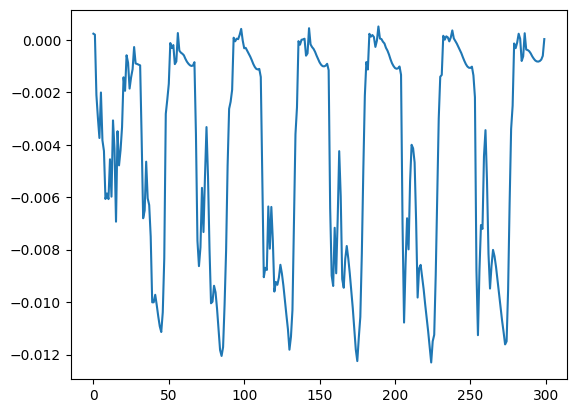

In [49]:
plt.plot(n1_w3[:, 0,0])
# n1_w3[:, 0,0,3].shape

In [50]:
np.min(w1_flatten)

-0.7085479216471416

In [51]:
np.concatenate([w1_flatten, w2_flatten, w3_flatten], axis=1).shape

(300, 4352)

In [52]:
# df = pd.DataFrame({'x': x, 'y': y, 'z': z, 'w': z+1 })
df = pd.DataFrame(data=w3_flatten)
# df = pd.DataFrame(data=np.concatenate([w1_flatten, w2_flatten, w3_flatten], axis=1))
df.shape

(300, 576)

In [53]:
# std_scaler = StandardScaler()
# scaled_df = std_scaler.fit_transform(df)

pca = PCA(n_components=3)
data_reduced = pca.fit_transform(df)

In [54]:
pca.components_, pca.components_.shape

(array([[-0.00187056, -0.0005209 ,  0.01578392, ..., -0.00183251,
          0.02904797, -0.01236346],
        [ 0.00044182,  0.00426782, -0.01891227, ..., -0.00446828,
         -0.04919734,  0.01556886],
        [ 0.0004121 ,  0.00206816,  0.02162679, ...,  0.00942859,
          0.02534517,  0.03874844]]),
 (3, 576))

In [55]:
data_reduced.shape

(300, 3)

In [56]:
data_reduced

array([[-1.11642023e-01, -1.33804779e+00,  1.26904283e+00],
       [-1.11797529e-01, -1.33786518e+00,  1.26870437e+00],
       [-1.05546587e+00, -5.40562314e-01,  1.38905967e+00],
       [-1.84865957e+00, -5.51469719e-02,  6.47516151e-01],
       [-1.64172210e+00,  6.84826527e-02,  3.44012650e-01],
       [-2.04893206e+00, -2.30216039e-01,  3.28113735e-01],
       [-1.83580810e+00, -2.73420634e-01,  1.72920453e-01],
       [-1.70951527e+00, -4.27746297e-01,  2.98251205e-01],
       [ 3.78839149e-01, -8.88704559e-01,  6.35132633e-01],
       [ 7.34755396e-01, -1.06227833e+00,  4.34639168e-01],
       [ 1.22477937e+00, -1.10539287e+00,  3.03521834e-01],
       [ 1.72043776e+00, -9.17062721e-01,  3.50933338e-02],
       [ 1.76559800e+00, -6.36080824e-01,  3.77805692e-01],
       [ 1.00695136e+00, -1.22920693e+00,  5.67483353e-01],
       [ 1.49025019e+00, -7.32186943e-01,  3.68073462e-01],
       [ 2.30242660e+00, -3.33279192e-01,  1.41144071e-01],
       [ 1.31499872e+00, -1.01133214e+00

(array([[24., 17., 20., 14., 18., 12.,  7., 17., 14., 17., 19., 11., 12.,
         14., 14., 14., 10., 16., 17., 13.],
        [14., 13., 18., 17., 17., 21., 15., 19., 14., 10., 10., 15., 12.,
         22., 17., 13., 16., 12., 11., 14.],
        [ 8., 14.,  8., 15., 14., 11., 13., 19., 18., 12., 11., 16., 11.,
         17., 19., 10., 25., 20., 23., 16.]]),
 array([-9.99635821e-02, -8.99770317e-02, -7.99904813e-02, -7.00039309e-02,
        -6.00173805e-02, -5.00308301e-02, -4.00442797e-02, -3.00577293e-02,
        -2.00711789e-02, -1.00846285e-02, -9.80781205e-05,  9.88847228e-03,
         1.98750227e-02,  2.98615731e-02,  3.98481235e-02,  4.98346739e-02,
         5.98212243e-02,  6.98077747e-02,  7.97943250e-02,  8.97808754e-02,
         9.97674258e-02]),
 <a list of 3 BarContainer objects>)

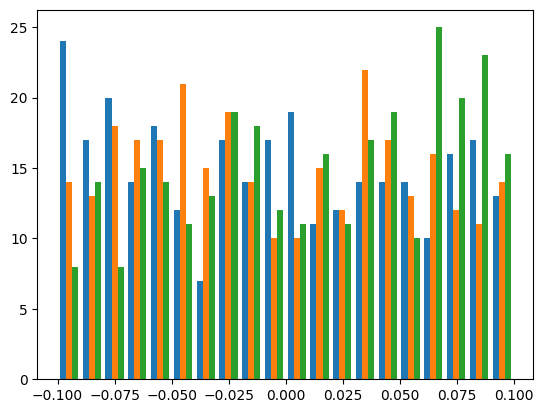

In [57]:
random_data = np.random.uniform(-.1, .1, size=(data_reduced.shape[0], data_reduced.shape[1]))
plt.hist(random_data, bins=20)

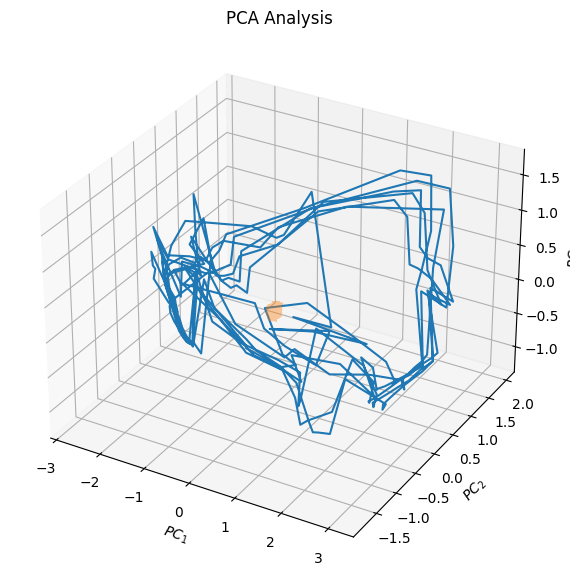

In [58]:
# Creating figure
fig = plt.figure(figsize = (7, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
x = data_reduced[:, 0]
y = data_reduced[:, 1]
z = data_reduced[:, 2]
ax.plot3D(x, y, z, label='evolved_coeff \n(locomotion task)')
ax.plot3D(random_data[:, 0], random_data[:, 1], random_data[:, 2], alpha=0.4, label='random_coeff\n(uniform distribution)')
plt.title("PCA Analysis")
ax.set_xlabel("$PC_1$")
ax.set_ylabel("$PC_2$")
ax.set_zlabel("$PC_3$")
# plt.legend(loc[1, 1])
# fig.subplots_adjust(right=0.8)
plt.show()

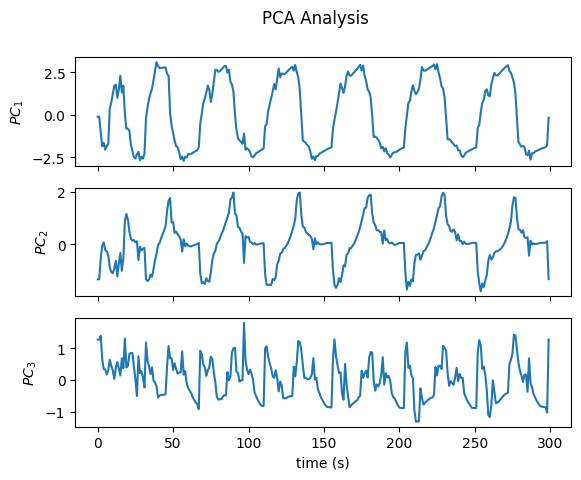

In [59]:
# Creating figure
# fig = plt.figure(figsize = (7, 7))
# ax = plt.axes(projection ="3d")
 
# Creating plot
x = data_reduced[:, 0]
y = data_reduced[:, 1]
z = data_reduced[:, 2]
# ax.plot3D(x, y, z, label='evolved_coeff \n(locomotion task)')
# ax.plot3D(random_data[:, 0], random_data[:, 1], random_data[:, 2], alpha=0.4, label='random_coeff\n(uniform distribution)')

fig, axs = plt.subplots(3, sharex=True)
fig.suptitle('PCA Analysis')
axs[0].plot(x)
axs[1].plot(y)
axs[2].plot(z)
axs[0].set_ylabel('$PC_1$')
axs[1].set_ylabel('$PC_2$')
axs[2].set_ylabel('$PC_3$')
plt.xlabel('time (s)')
plt.show()

In [23]:
a = torch.rand((2, 12))
torch.cat((a, torch.zeros((2,1))), dim=1)

tensor([[0.5848, 0.8819, 0.7132, 0.0767, 0.2172, 0.6549, 0.4845, 0.1302, 0.9722,
         0.3077, 0.7547, 0.0696, 0.0000],
        [0.1033, 0.9163, 0.1233, 0.4107, 0.8024, 0.9239, 0.8690, 0.9177, 0.8184,
         0.6380, 0.8875, 0.0667, 0.0000]])

In [19]:
a

tensor([[0.3561, 0.0171, 0.9686, 0.9662, 0.9246, 0.9556, 0.3200, 0.6349, 0.2220,
         0.2897, 0.8269, 0.5675],
        [0.9106, 0.1151, 0.7097, 0.2299, 0.5729, 0.5649, 0.5309, 0.8097, 0.5340,
         0.0720, 0.5508, 0.3789]])

In [22]:
torch.zeros((2,1))

tensor([[0.],
        [0.]])

In [2]:
x = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
x = torch.tensor(x)
x = x.reshape(-1,7)
a=0.19
b= torch.tensor([a])

torch.cat((x,b.expand((2,1))),dim=1)


tensor([[ 1.0000,  2.0000,  3.0000,  4.0000,  5.0000,  6.0000,  7.0000,  0.1900],
        [ 8.0000,  9.0000, 10.0000, 11.0000, 12.0000, 13.0000, 14.0000,  0.1900]])

In [7]:
torch.Tensor([1,2]).shape

torch.Size([2])

In [6]:
x[:, 2] = torch.Tensor([1,2])
x

tensor([[ 1,  2,  1,  4,  5,  6,  1],
        [ 8,  9,  2, 11, 12, 13,  2]])

In [39]:
np.random.uniform(-0.1, 0, size=(2,2)).astype(dtype=np.float32)

array([[-0.03211826, -0.08656982],
       [-0.0008262 , -0.08954872]], dtype=float32)

In [11]:
torch.Tensor(3, 1).uniform_(-0.1, 0.0)

tensor([[-0.0217],
        [-0.0057],
        [-0.0079]])

### Hebbian network

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits import mplot3d

In [31]:
# w1 = np.load('./behavior/rd/walk/hebb/249/vxuy/w1Hebb_275.npy')
# w2 = np.load('./behavior/rd/walk/hebb/249/vxuy/w2Hebb_275.npy')
# w3 = np.load('./behavior/rd/walk/hebb/249/vxuy/w3Hebb_275.npy')
# action = np.load('./behavior/rd/walk/hebb/249/vxuy/actionsHebb_275.npy')
# param = np.load('./behavior/rd/walk/hebb/249/vxuy/paramHebb_275.npy')
# arch = [27, 64, 32, 18]

w1 = np.load('./behavior/rd/walk/hebb/499/vxuy/w1Hebb_345.npy')
w2 = np.load('./behavior/rd/walk/hebb/499/vxuy/w2Hebb_345.npy')
w3 = np.load('./behavior/rd/walk/hebb/499/vxuy/w3Hebb_345.npy')
action = np.load('./behavior/rd/walk/hebb/499/vxuy/actionsHebb_345.npy')
param = np.load('./behavior/rd/walk/hebb/499/vxuy/paramHebb_345.npy')
arch = [27, 64, 32, 18]

In [32]:
n1_w1 = w1[:, 0, :]
n1_w2 = w2[:, 0, :]
n1_w3 = w3[:, 0, :]
n1_action = action[:, 0, :]

In [33]:
print('numbe of weight: ', param.shape[0]//5)

numbe of weight:  4352


In [34]:
w_num = 4352
A = param[0:w_num]
B = param[w_num:2*w_num]
C = param[2*w_num:3*w_num]
D = param[3*w_num:4*w_num]
lr = param[4*w_num:5*w_num]

In [35]:
output_list = ['BC1', 'BC2', 'BC4', 'BC5', 'BC0', 'BC3', 
               'CF1', 'CF2', 'CF4', 'CF5', 'CF0', 'CF3', 
               'FT1', 'FT2', 'FT4', 'FT5', 'FT0', 'FT3']
# index = [3, 6, 12, 15, 4, 7,
#          13, 16, 0, 9, 5, 8,
#          14, 17, 1, 10, 2, 11]
# motorspace --> joint standard space
index = [4, 0, 1, 5, 2, 3, 
         10, 6, 7, 11, 8, 9, 
         16, 12, 13, 17, 14, 15]

In [36]:
np.take(output_list, index)

array(['BC0', 'BC1', 'BC2', 'BC3', 'BC4', 'BC5', 'CF0', 'CF1', 'CF2',
       'CF3', 'CF4', 'CF5', 'FT0', 'FT1', 'FT2', 'FT3', 'FT4', 'FT5'],
      dtype='<U3')

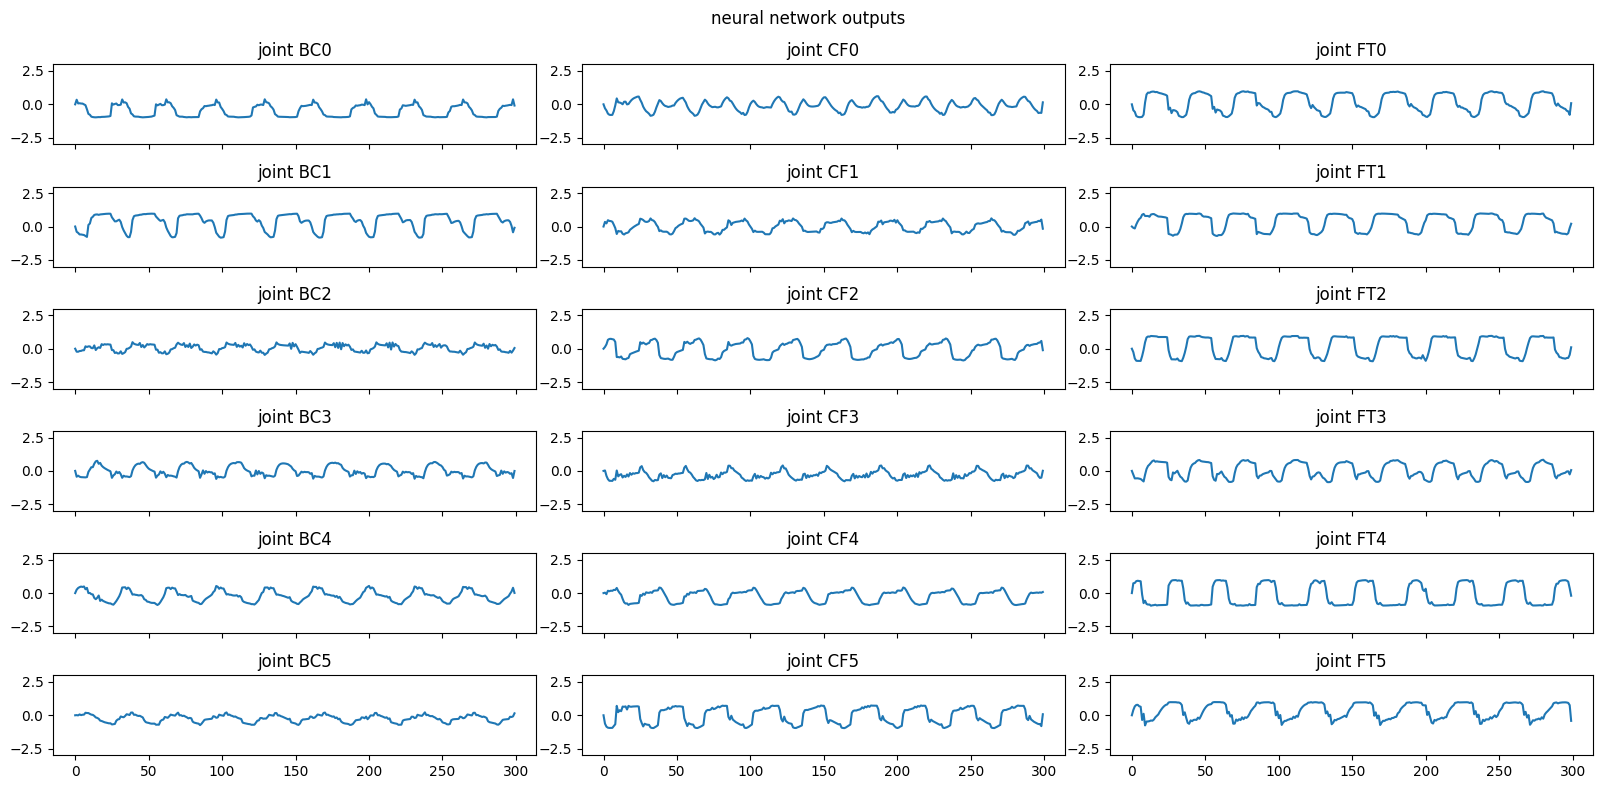

In [37]:
n1_action = action[:, 0, :]
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('neural network outputs')
output_list = ['BC1', 'BC2', 'BC4', 'BC5', 'BC0', 'BC3', 
               'CF1', 'CF2', 'CF4', 'CF5', 'CF0', 'CF3', 
               'FT1', 'FT2', 'FT4', 'FT5', 'FT0', 'FT3']
index = [4, 10, 16, 0, 6, 12,
         1, 7, 13, 5, 11, 17,
         2, 8, 14, 3, 9, 15]
output_list = np.take(output_list, index)
for i in range(6):
    for j in range(3):
        axes[i, j].plot(n1_action[:, index[(i*3)+j]])
        axes[i, j].set_title('joint '+output_list[(i*3)+j])
        axes[i, j].set_ylim([-3, 3]) # rad
fig.tight_layout()
# plt.savefig('hebb_output.jpg', bbox_inches='tight')

In [1]:
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('Weight each timestep')
for i in range(6,):
    for j in range(3):
        axes[i, j].plot(n1_w1[:, 16, (i*3)+j])
        axes[i, j].set_title('Layer 1 w(0, '+str((i*3)+j)+')')
        axes[i, j].set_ylim([-0.2, 0.2]) # rad
fig.tight_layout()
# plt.savefig('hebb_w1.jpg', bbox_inches='tight')

NameError: name 'plt' is not defined

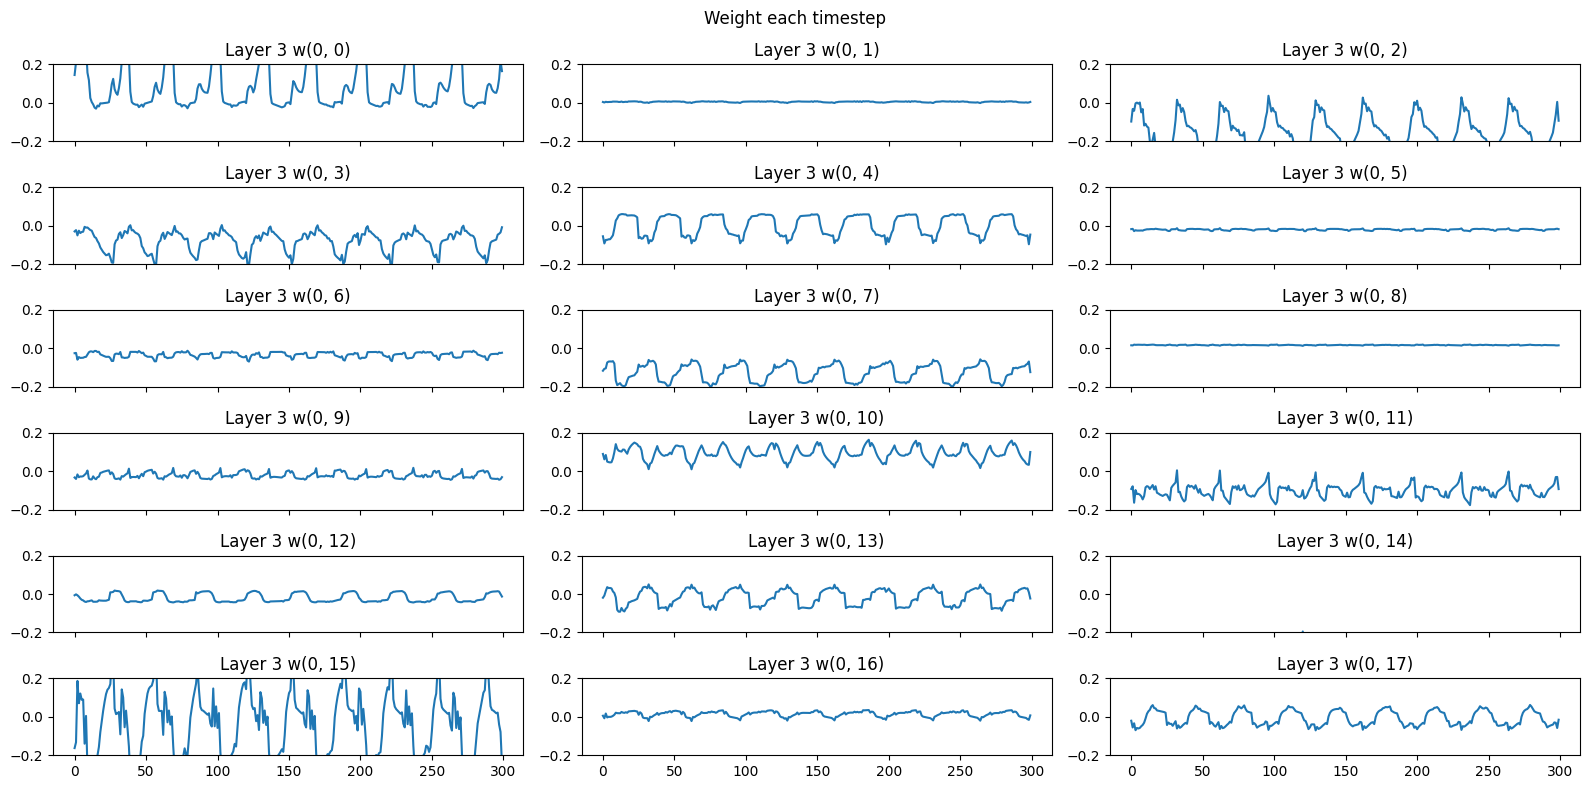

In [40]:
fig, axes = plt.subplots(6, 3, sharex=True, figsize=(16,8))
fig.suptitle('Weight each timestep')
for i in range(6):
    for j in range(3):
        axes[i, j].plot(n1_w3[:, 0, (i*3)+j])
        axes[i, j].set_title('Layer 3 w(0, '+str((i*3)+j)+')')
        axes[i, j].set_ylim([-0.2, 0.2]) # rad
fig.tight_layout()
# plt.savefig('hebb_w3.jpg', bbox_inches='tight')

## PCA Analysis

In [41]:
print('numbe of weight: ', param.shape[0]//5)

numbe of weight:  4352


In [42]:
w1_flatten = n1_w1.reshape(n1_w1.shape[0], -1)
w2_flatten = n1_w2.reshape(n1_w2.shape[0], -1)
w3_flatten = n1_w3.reshape(n1_w3.shape[0], -1)

In [43]:
n1_w3[::2, 0, 0].shape

(150,)

In [44]:
w1_flatten.shape, w2_flatten.shape, w3_flatten.shape

((300, 1728), (300, 2048), (300, 576))

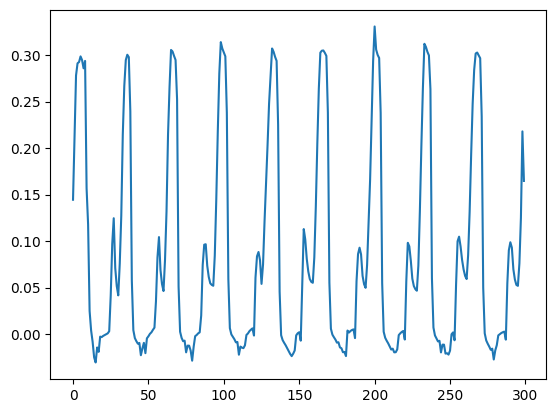

In [45]:
plt.plot(n1_w3[:, 0,0])
# n1_w3[:, 0,0,3].shape

In [46]:
np.min(w1_flatten)

-1.0

In [47]:
np.concatenate([w1_flatten, w2_flatten, w3_flatten], axis=1).shape

(300, 4352)

In [48]:
# df = pd.DataFrame({'x': x, 'y': y, 'z': z, 'w': z+1 })
df = pd.DataFrame(data=w3_flatten)
# df = pd.DataFrame(data=np.concatenate([w1_flatten, w2_flatten, w3_flatten], axis=1))
df.shape

(300, 576)

In [49]:
# std_scaler = StandardScaler()
# scaled_df = std_scaler.fit_transform(df)

pca = PCA(n_components=3)
data_reduced = pca.fit_transform(df)

In [50]:
pca.components_, pca.components_.shape

(array([[ 0.03786176, -0.00087784,  0.01862119, ...,  0.00530634,
          0.00133354,  0.00142845],
        [ 0.06505544,  0.00043375,  0.07648068, ..., -0.00185197,
          0.00340637, -0.00730863],
        [ 0.06468817,  0.00171438, -0.04543999, ...,  0.00708448,
         -0.00299557,  0.00038983]]),
 (3, 576))

In [51]:
data_reduced.shape

(300, 3)

In [52]:
data_reduced

array([[ 0.56911265,  0.21959896, -0.26949658],
       [ 1.63517401,  0.41764139, -0.2740905 ],
       [ 2.55816014,  0.51631798, -0.20796676],
       [ 3.15646047,  0.89784363, -0.14149322],
       [ 3.12189499,  0.96906647, -0.10544689],
       [ 3.07251941,  1.15597712, -0.04968534],
       [ 2.92735464,  1.20526196, -0.01659064],
       [ 1.62018538,  1.90574287,  0.48502759],
       [ 1.10815266,  1.93747607,  0.87610811],
       [-0.68063571,  1.17141461, -0.27923153],
       [-1.48849875,  0.88134064, -0.42911138],
       [-1.74003587,  0.60057855, -0.48740109],
       [-1.79038418,  0.4511355 , -0.45217829],
       [-2.39832596,  0.3974282 , -0.57825643],
       [-2.59841927,  0.15377143, -0.5785703 ],
       [-2.61169701,  0.0939716 , -0.58984113],
       [-2.25899539,  0.0240265 , -0.49469428],
       [-2.19585863, -0.35135483, -0.24672495],
       [-2.03372903, -0.51697885,  0.0863049 ],
       [-1.97958761, -0.70977746,  0.32962507],
       [-1.93106869, -0.87982853,  0.510

(array([[16., 15., 15., 21., 16., 12., 12.,  9., 19., 14., 13., 12., 16.,
         15., 14., 18., 10., 17., 18., 18.],
        [16., 19., 20., 19., 19.,  9., 14., 15., 12., 13., 14., 15., 10.,
         15., 15., 12., 14., 16., 20., 13.],
        [20., 21., 13., 14., 11.,  8., 14., 13., 16., 12., 15., 16., 24.,
         15., 16., 16., 20., 14., 13.,  9.]]),
 array([-9.99981495e-03, -9.00173603e-03, -8.00365710e-03, -7.00557818e-03,
        -6.00749926e-03, -5.00942034e-03, -4.01134142e-03, -3.01326250e-03,
        -2.01518358e-03, -1.01710465e-03, -1.90257320e-05,  9.79053190e-04,
         1.97713211e-03,  2.97521103e-03,  3.97328995e-03,  4.97136888e-03,
         5.96944780e-03,  6.96752672e-03,  7.96560564e-03,  8.96368456e-03,
         9.96176348e-03]),
 <a list of 3 BarContainer objects>)

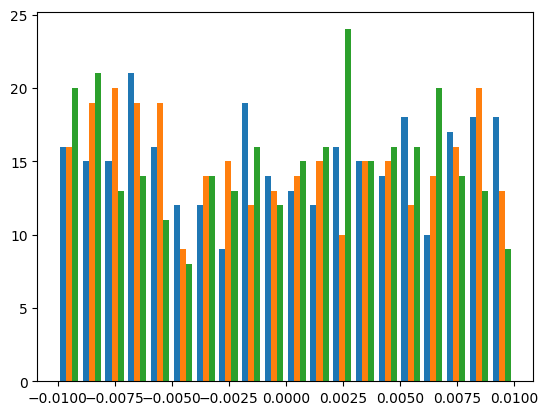

In [27]:
random_data = np.random.uniform(-.01, .01, size=(data_reduced.shape[0], data_reduced.shape[1]))
plt.hist(random_data, bins=20)

In [53]:
x1 = data_reduced[:, 0]
y1 = data_reduced[:, 1]
z1 = data_reduced[:, 2]

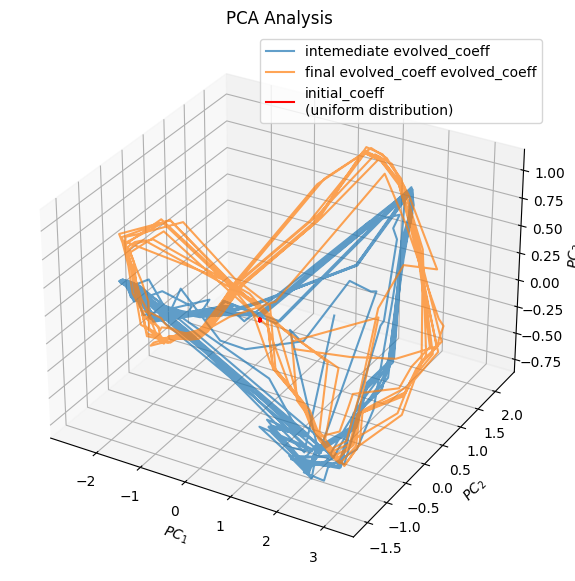

In [54]:
# Creating figure
fig = plt.figure(figsize = (7, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.plot3D(x, y, z, label='intemediate evolved_coeff', alpha=0.7)
ax.plot3D(x1, y1, z1, label='final evolved_coeff evolved_coeff', alpha=0.7)
ax.plot3D(random_data[:, 0], random_data[:, 1], random_data[:, 2], label='initial_coeff\n(uniform distribution)', color='red')
plt.title("PCA Analysis")
ax.set_xlabel("$PC_1$")
ax.set_ylabel("$PC_2$")
ax.set_zlabel("$PC_3$")
plt.legend()
# fig.subplots_adjust(right=0.8)
plt.show()

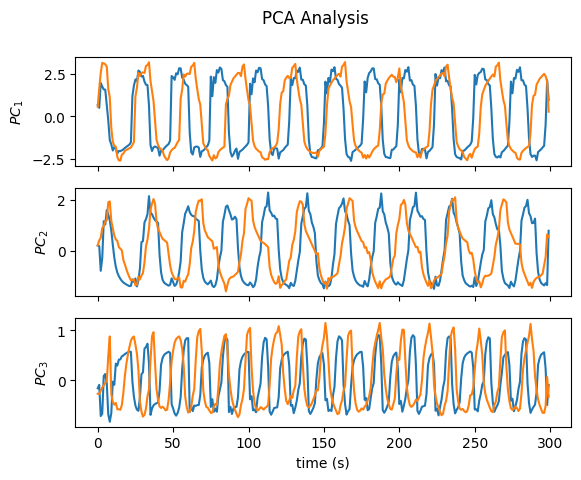

In [56]:
# Creating figure
# fig = plt.figure(figsize = (7, 7))
# ax = plt.axes(projection ="3d")
 
# Creating plot
# x = data_reduced[:, 0]
# y = data_reduced[:, 1]
# z = data_reduced[:, 2]
# ax.plot3D(x, y, z, label='evolved_coeff \n(locomotion task)')
# ax.plot3D(random_data[:, 0], random_data[:, 1], random_data[:, 2], alpha=0.4, label='random_coeff\n(uniform distribution)')

fig, axs = plt.subplots(3, sharex=True)
fig.suptitle('PCA Analysis')
axs[0].plot(x)
axs[1].plot(y)
axs[2].plot(z)
axs[0].plot(x1)
axs[1].plot(y1)
axs[2].plot(z1)
axs[0].set_ylabel('$PC_1$')
axs[1].set_ylabel('$PC_2$')
axs[2].set_ylabel('$PC_3$')
plt.xlabel('time (s)')
plt.show()

In [ ]:
task = 'object'
test_env = ['bigball', 'bigcube','nobox']

for i in test_env:
    w1 = np.load('./behavior/rd/walk/hebb/499/vxuy/w1Hebb_345.npy')
    w2 = np.load('./behavior/rd/walk/hebb/499/vxuy/w2Hebb_345.npy')
    w3 = np.load('./behavior/rd/walk/hebb/499/vxuy/w3Hebb_345.npy')
    action = np.load('./behavior/rd/walk/hebb/499/vxuy/actionsHebb_345.npy')
    param = np.load('./behavior/rd/walk/hebb/499/vxuy/paramHebb_345.npy')
    arch = [27, 64, 32, 18]